In [1]:
import torch
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('mnist_train.csv')

In [3]:
#df.iloc[0]

In [7]:
torch.cuda.is_available()

False

In [6]:
cuda0 = torch.device('cuda:0')

In [9]:
one = torch.from_numpy(df.iloc[0].values).int()

In [10]:
one.shape

torch.Size([785])

In [11]:
one = torch.reshape(one[1:], (28,28))

In [12]:
one.shape

torch.Size([28, 28])

In [13]:
one[4:7,4:14]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   3,  18],
        [  0,   0,   0,   0,  30,  36,  94, 154, 170, 253]], dtype=torch.int32)

In [14]:
df_one = pd.DataFrame(one)
df_one = df_one.astype(float)

In [15]:
df_one.style.background_gradient('Greys')



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0


In [37]:
seven_tensors = torch.Tensor(df[df.label == 7][df.columns[1:]].values).int().reshape(-1,28,28)
three_tensors = torch.Tensor(df[df.label == 3][df.columns[1:]].values).int().reshape(-1,28,28)

In [18]:
len(three_tensors),len(seven_tensors)

(6131, 6265)

In [19]:
import matplotlib.pyplot as plt

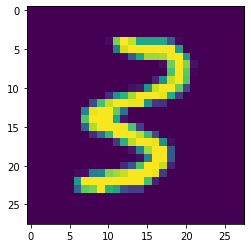

In [20]:
plt.imshow(three_tensors[500])

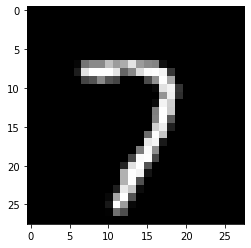

In [21]:
plt.imshow(seven_tensors[200], cmap='gray')

In [28]:
stacked_sevens = seven_tensors.float()/255
stacked_threes = three_tensors.float()/255
stacked_threes.shape

torch.Size([6131, 28, 28])

In [29]:
len(stacked_threes.shape)

3

In [30]:
stacked_threes.ndim

3

In [35]:
mean3 = stacked_threes.mean(0)

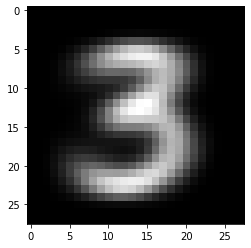

In [34]:
plt.imshow(stacked_threes.mean(0), cmap='gray')

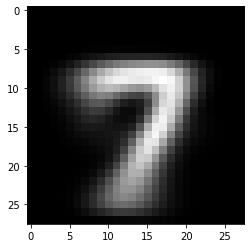

In [36]:
mean7 = stacked_sevens.mean(0)
plt.imshow(mean7, cmap='gray')

In [50]:
a_3 = stacked_threes[6]

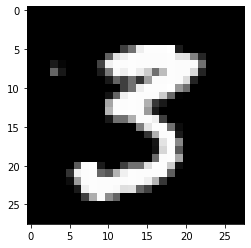

In [51]:
plt.imshow(a_3, cmap='gray')

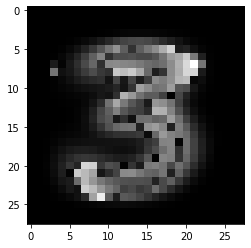

In [52]:
dist_3_abs_tensor = (a_3-mean3).abs()
plt.imshow(dist_3_abs_tensor, cmap='gray')

In [59]:
dist_3_abs = dist_3_abs_tensor.mean()
dist_3_sqr = ((a_3 - mean3)**2).mean()
dist_3_abs,dist_3_sqr

(tensor(0.1147), tensor(0.0427))

In [54]:
dist_7_abs = (a_3 - mean7).abs().mean()
dist_7_sqr = ((a_3 - mean7)**2).mean().sqrt()
dist_7_abs,dist_7_sqr

(tensor(0.1558), tensor(0.2998))

In [55]:
import torch.nn.functional as F

In [60]:
F.l1_loss(a_3,mean3),F.mse_loss(a_3,mean3)

(tensor(0.1147), tensor(0.0427))

In [61]:
data = [[1,2,3],[4,5,6]]
arr = np.array (data)
tns = torch.tensor(data)

In [62]:
tns.type()

'torch.LongTensor'

In [65]:
(tns*1.5).type()

'torch.FloatTensor'

In [66]:
!ls

README.md	 examples	 mnist_train.csv
docker-examples  mnist_test.csv  tutorials


In [75]:
df_valid = pd.read_csv('mnist_test.csv')

In [76]:
valid_3_tens = torch.Tensor(df[df.label == 3][df_valid.columns[1:]].values).int().reshape(-1,28,28)
valid_3_tens = valid_3_tens.float()/255
valid_7_tens = torch.Tensor(df[df.label == 7][df_valid.columns[1:]].values).int().reshape(-1,28,28)
valid_7_tens = valid_7_tens.float()/255
valid_3_tens.shape,valid_7_tens.shape

(torch.Size([6131, 28, 28]), torch.Size([6265, 28, 28]))

In [77]:
def mnist_distance(a,b): return (a-b).abs().mean((-1,-2))
mnist_distance(a_3, mean3)

tensor(0.1147)

In [78]:
valid_3_tens.shape, mean3.shape

(torch.Size([6131, 28, 28]), torch.Size([28, 28]))

In [79]:
valid_3_dist = mnist_distance(valid_3_tens, mean3)
valid_3_dist, valid_3_dist.shape

(tensor([0.1261, 0.1074, 0.1310,  ..., 0.1178, 0.1564, 0.1182]),
 torch.Size([6131]))

In [80]:
def is_3(x): return mnist_distance(x,mean3) < mnist_distance(x,mean7)

In [81]:
is_3(a_3), is_3(a_3).float()

(tensor(True), tensor(1.))

In [82]:
accuracy_3s =      is_3(valid_3_tens).float() .mean()
accuracy_7s = (1 - is_3(valid_7_tens).float()).mean()

In [83]:
accuracy_3s,accuracy_7s,(accuracy_3s+accuracy_7s)/2

(tensor(0.8912), tensor(0.9962), tensor(0.9437))

In [112]:
xt = torch.tensor(2.)

In [113]:
xt.requires_grad_()

tensor(2., requires_grad=True)

In [114]:
xt

tensor(2., requires_grad=True)

In [115]:
def f(x): return x**3

In [116]:
yt = f(xt)
yt

tensor(8., grad_fn=<PowBackward0>)

In [117]:
yt.backward()

In [118]:
xt.grad

tensor(12.)

In [120]:
xt = torch.tensor([3.,4.,10.]).requires_grad_()
xt

tensor([ 3.,  4., 10.], requires_grad=True)

In [121]:
def f(x): return (x**2).sum()

yt = f(xt)
yt

tensor(125., grad_fn=<SumBackward0>)

In [122]:
yt.backward()
xt.grad

tensor([ 6.,  8., 20.])

In [123]:
time = torch.arange(0,20).float(); time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19.])

In [263]:
aa=2; bb=4

In [264]:
time = torch.arange(0,20).float()
time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19.])

In [265]:
??torch.randn

Docstring:
randn(*size, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) -> Tensor

Returns a tensor filled with random numbers from a normal distribution
with mean `0` and variance `1` (also called the standard normal
distribution).

.. math::
    \text{out}_{i} \sim \mathcal{N}(0, 1)

The shape of the tensor is defined by the variable argument :attr:`size`.

Args:
    size (int...): a sequence of integers defining the shape of the output tensor.
        Can be a variable number of arguments or a collection like a list or tuple.
    out (Tensor, optional): the output tensor.
    dtype (:class:`torch.dtype`, optional): the desired data type of returned tensor.
        Default: if ``None``, uses a global default (see :func:`torch.set_default_tensor_type`).
    layout (:class:`torch.layout`, optional): the desired layout of returned Tensor.
        Default: ``torch.strided``.
    device (:class:`torch.device`, optional): the desired device of returned tensor.

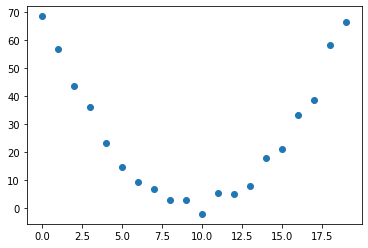

In [266]:
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1
plt.scatter(time,speed);

In [267]:
def f(t, params):
    a,b,c = params
    return a*(t**2) + (b*t) + c

In [268]:
def mse(preds, targets): return ((preds-targets)**2).mean()

In [269]:
params = torch.randn(3).requires_grad_()

In [270]:
orig_params = params.clone()

In [271]:
preds = f(time, params)

In [272]:
??torch.Tensor.detach

Docstring:
Returns a new Tensor, detached from the current graph.

The result will never require gradient.

.. note::

  Returned Tensor shares the same storage with the original one.
  In-place modifications on either of them will be seen, and may trigger
  errors in correctness checks.
  IMPORTANT NOTE: Previously, in-place size / stride / storage changes
  (such as `resize_` / `resize_as_` / `set_` / `transpose_`) to the returned tensor
  also update the original tensor. Now, these in-place changes will not update the
  original tensor anymore, and will instead trigger an error.
  For sparse tensors:
  In-place indices / values changes (such as `zero_` / `copy_` / `add_`) to the
  returned tensor will not update the original tensor anymore, and will instead
  trigger an error.
Type:      method_descriptor


In [273]:
def show_preds(preds, ax=None):
    if ax is None: ax=plt.subplots()[1]
    ax.scatter(time, speed)
    ax.scatter(time, preds.detach().numpy(), color='red')
    #ax.set_ylim(-300,100)

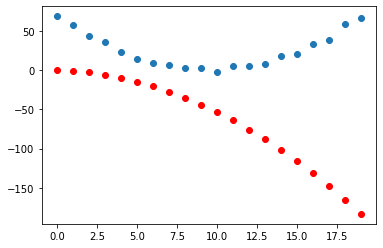

In [274]:
show_preds(preds)

In [275]:
loss = mse(preds, speed)
loss

tensor(12487.7500, grad_fn=<MeanBackward0>)

In [276]:
loss.backward()
params.grad

tensor([-36495.8281,  -2348.0811,   -180.2215])

In [277]:
params.grad * 1e-5

tensor([-0.3650, -0.0235, -0.0018])

In [314]:
params

tensor([ 0.1717, -0.6160,  0.5363], requires_grad=True)

In [279]:
# params -= lr * params.grad.data
# ---------------------------------------------------------------------------
# RuntimeError                              Traceback (most recent call last)
# <ipython-input-177-e02ba1ef5d50> in <module>
# ----> 1 params -= lr * params.grad.data

# RuntimeError: a leaf Variable that requires grad is being used in an in-place operation

In [280]:
lr = 1e-5
params.data -= lr * params.grad.data
params.grad = None

In [281]:
def apply_step(params, prn=True):
    preds = f(time, params)
    loss = mse(preds, speed)
    loss.backward()
    params.data -= lr * params.grad.data
    params.grad = None
    if prn: print(loss.item())
    return preds

In [282]:
lr = 1e-6

In [315]:
for i in range(10): apply_step(params)

651.3079833984375
651.3075561523438
651.3070678710938
651.3067626953125
651.3062744140625
651.3057861328125
651.3053588867188
651.3049926757812
651.3046264648438
651.3040771484375


In [284]:
#hide
params = orig_params.detach().requires_grad_()

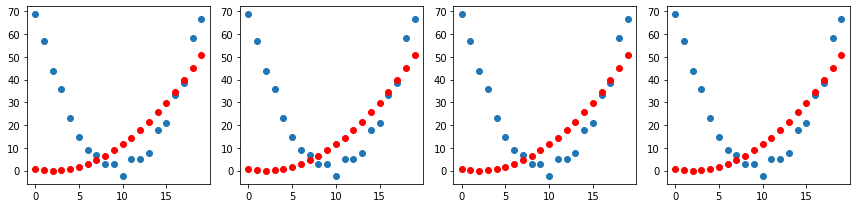

In [316]:
_,axs = plt.subplots(1,4,figsize=(12,3))
for ax in axs: show_preds(apply_step(params, False), ax)
plt.tight_layout()

In [292]:
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)

In [318]:
train_y = torch.tensor([1]*len(stacked_threes) + [0]*len(stacked_sevens)).unsqueeze(1)
train_x.shape,train_y.shape

(torch.Size([12396, 784]), torch.Size([12396, 1]))

In [326]:
torch.tensor([1]*2 + [0]*3).unsqueeze(1)

tensor([[1],
        [1],
        [0],
        [0],
        [0]])

In [333]:
dset = list(zip(train_x,train_y))
x,y = dset[0]
x.shape,y

(torch.Size([784]), tensor([1]))

In [337]:
np.array([1,2,3])@np.array([[4],[5],[6]])

array([32])

In [338]:
valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28*28)
valid_y = torch.tensor([1]*len(valid_3_tens) + [0]*len(valid_7_tens)).unsqueeze(1)
valid_dset = list(zip(valid_x,valid_y))

In [340]:
def init_params(size, std=1.0): return (torch.randn(size)*std).requires_grad_()

In [362]:
weights = init_params((28*28,1))

In [363]:
bias = init_params(1)

In [364]:
(train_x[0]*weights.T).sum() + bias

tensor([-11.8828], grad_fn=<AddBackward0>)

In [365]:
def linear1(xb): return xb@weights + bias
preds = linear1(train_x)
preds

tensor([[-11.8828],
        [ -8.6760],
        [ -6.7320],
        ...,
        [-12.3247],
        [ -5.9367],
        [ -7.0124]], grad_fn=<AddBackward0>)

In [366]:
corrects = (preds>0.0).float() == train_y
corrects

tensor([[False],
        [False],
        [False],
        ...,
        [ True],
        [ True],
        [ True]])

In [367]:
corrects.float().mean().item()

0.5636495351791382

In [411]:
with torch.no_grad(): weights *= 2

In [417]:
weights.sum()

tensor(-79.5371, grad_fn=<SumBackward0>)

In [418]:
preds = linear1(train_x)
((preds>0.0).float() == train_y).float().mean().item()

0.5653436779975891

In [419]:
linear1(train_x[0])

tensor([-46.2316], grad_fn=<AddBackward0>)

In [420]:
def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    return torch.where(targets==1, 1-predictions, predictions).mean()

In [422]:
from torch.utils.data import DataLoader

# train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
# test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

In [423]:
coll = range(15)
dl = DataLoader(coll, batch_size=5, shuffle=True)
list(dl)

[tensor([7, 5, 0, 9, 1]),
 tensor([11,  2,  6,  8, 13]),
 tensor([12,  3, 14,  4, 10])]

In [430]:
ds = [(char, ord(char)-97) for char in 'abcdefghijklmno']


In [431]:
ds = L(enumerate(string.ascii_lowercase))
ds

NameError: name 'L' is not defined

In [433]:
dl = DataLoader(ds, batch_size=6, shuffle=True)
dl

## Finale

In [434]:
weights = init_params((28*28,1))
bias = init_params(1)

In [443]:
dl = DataLoader(dset, batch_size=256)
xb,yb = list(dl)[0]
xb.shape,yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [444]:
valid_dl = DataLoader(valid_dset, batch_size=256)

In [445]:
batch = train_x[:4]
batch.shape

torch.Size([4, 784])

In [446]:
preds = linear1(batch)
preds

tensor([[8.0896],
        [7.8730],
        [2.1192],
        [6.8070]], grad_fn=<AddBackward0>)

In [447]:
loss = mnist_loss(preds, train_y[:4])
loss

tensor(0.0273, grad_fn=<MeanBackward0>)

In [448]:
loss.backward()
weights.grad.shape,weights.grad.mean(),bias.grad

(torch.Size([784, 1]), tensor(-0.0044), tensor([-0.0244]))

In [449]:
def calc_grad(xb, yb, model):
    preds = model(xb)
    loss = mnist_loss(preds, yb)
    loss.backward()

In [450]:
calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(),bias.grad

(tensor(-0.0087), tensor([-0.0488]))

In [451]:
calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(),bias.grad

(tensor(-0.0131), tensor([-0.0732]))

In [452]:
weights.grad.zero_()
bias.grad.zero_()

In [453]:
def train_epoch(model, lr, params):
    for xb,yb in dl:
        calc_grad(xb, yb, model)
        for p in params:
            p.data -= p.grad*lr
            p.grad.zero_()

In [454]:
(preds>0.0).float() == train_y[:4]

tensor([[True],
        [True],
        [True],
        [True]])

In [455]:
def batch_accuracy(xb, yb):
    preds = xb.sigmoid()
    correct = (preds>0.5) == yb
    return correct.float().mean()

In [456]:
batch_accuracy(linear1(batch), train_y[:4])

tensor(1.)

In [457]:
def validate_epoch(model):
    accs = [batch_accuracy(model(xb), yb) for xb,yb in valid_dl]
    return round(torch.stack(accs).mean().item(), 4)

In [458]:
validate_epoch(linear1)

0.4792

In [459]:
lr = 1.
params = weights,bias
train_epoch(linear1, lr, params)
validate_epoch(linear1)

0.7075

In [460]:
for i in range(20):
    train_epoch(linear1, lr, params)
    print(validate_epoch(linear1), end=' ')

0.8388 0.9056 0.929 0.9425 0.9484 0.9538 0.9571 0.9607 0.9628 0.965 0.9669 0.9686 0.9697 0.9705 0.9711 0.972 0.973 0.9735 0.9743 0.9752 

## optimizer

In [461]:
linear_model = torch.nn.Linear(28*28,1)

In [462]:
w,b = linear_model.parameters()
w.shape,b.shape

(torch.Size([1, 784]), torch.Size([1]))

In [463]:
class BasicOptim:
    def __init__(self,params,lr): self.params,self.lr = list(params),lr

    def step(self, *args, **kwargs):
        for p in self.params: p.data -= p.grad.data * self.lr

    def zero_grad(self, *args, **kwargs):
        for p in self.params: p.grad = None

In [464]:
opt = BasicOptim(linear_model.parameters(), lr)

In [489]:
def train_epoch(model):
    for xb,yb in dl:
        calc_grad(xb, yb, model)
        opt.step()
        opt.zero_grad()

In [490]:
validate_epoch(linear_model)

0.9847

In [467]:
def train_model(model, epochs):
    for i in range(epochs):
        train_epoch(model)
        print(validate_epoch(model), end=' ')

In [468]:
train_model(linear_model, 20)

0.4888 0.7552 0.849 0.9098 0.9357 0.9483 0.9558 0.9613 0.9648 0.9695 0.9711 0.9728 0.974 0.975 0.9763 0.977 0.9779 0.9782 0.9786 0.979 

In [469]:
opt = torch.optim.SGD(linear_model.parameters(), lr=lr)


In [470]:
train_model(linear_model, 20)

0.9796 0.9801 0.9808 0.981 0.981 0.9817 0.9819 0.9822 0.9825 0.9825 0.9829 0.9831 0.9835 0.9837 0.9839 0.984 0.9842 0.9845 0.9847 0.9847 

In [473]:
w1 = init_params((28*28,30))
b1 = init_params(30)
w2 = init_params((30,1))
b2 = init_params(1)

In [509]:
simple_net = torch.nn.Sequential(
    torch.nn.Linear(28*28,30),
    torch.nn.ReLU(),
    torch.nn.Linear(30,1)
)
opt = torch.optim.SGD(simple_net.parameters(), lr=lr)

In [510]:
train_model(simple_net, 20)

0.5112 0.7356 0.8912 0.925 0.9404 0.9481 0.9537 0.9584 0.9622 0.9653 0.9672 0.9688 0.9699 0.9712 0.9719 0.9725 0.9738 0.9746 0.975 0.9756 

In [508]:
for xb,yb in dl:
    preds = simple_net(xb)
    loss = mnist_loss(preds, yb)
    loss.backward()
    opt.step()
    opt.zero_grad()
print(validate_epoch(simple_net), end=' ')

0.9266 

In [488]:
train_epoch(simple_net)
print(validate_epoch(simple_net), end=' ')

0.4888 

In [487]:
# for epoch in range(20):
#     pred_y = simple_net(data_x)
#     loss = loss_function(pred_y, data_y)
#     losses.append(loss.item())

#     model.zero_grad()
#     loss.backward()

#     opt.step()

#     print(validate_epoch(simple_net), end=' ')